<a href="https://colab.research.google.com/github/ducodbs0516/pdm18/blob/main/py-pandas/pandas_6_iot_nano33_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## [데이터 로드 1.]
- loading real-time json file from MongoDB via web

- http://chaos.inje.ac.kr:3030/client_33.html

In [ ]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
# url="http://chaos.inje.ac.kr:3030/iot"
# df=pd.read_json(url)
# print('Large IoT data was retrieved successfully from MongoDB!')

## [데이터 로드 2.]
- Load the compressed data from github.com

In [1]:
# Load the compressed data from github.com
# https://towardsdatascience.com/4-awesome-ways-of-loading-ml-data-in-google-colab-9a5264c61966
# url_zip = 'https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip'
!wget https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip
!unzip iot_data_201005_raw.zip

--2021-10-14 04:22:38--  https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip [following]
--2021-10-14 04:22:38--  https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8389520 (8.0M) [application/zip]
Saving to: ‘iot_data_201005_raw.zip’

iot_data_201005_raw 100%[===================>]   8.00M  --.-KB/s    in 0.06s   

2021-10-14 04

In [4]:
df = pd.read_csv("iot_data_201005_raw.csv", index_col=False)
df.head()

,Unnamed: 0,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,0,5f52e97f3d26c027a020fcd1,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9,0
1,1,5f52e9843d26c027a020fcd2,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3,0
2,2,5f52e9893d26c027a020fcd3,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3,0
3,3,5f52e98e3d26c027a020fcd4,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9,0
4,4,5f52e9933d26c027a020fcd5,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9,0


In [5]:
df.head()

,Unnamed: 0,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,0,5f52e97f3d26c027a020fcd1,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9,0
1,1,5f52e9843d26c027a020fcd2,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3,0
2,2,5f52e9893d26c027a020fcd3,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3,0
3,3,5f52e98e3d26c027a020fcd4,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9,0
4,4,5f52e9933d26c027a020fcd5,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9,0


In [6]:
df.tail()

,Unnamed: 0,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
511657,511657,5f7a733111799622e801a745,2020-10-05 10:13:21.563,30.5,31.2,413,1009.2,34.2,34.0,31.8,0
511658,511658,5f7a733611799622e801a746,2020-10-05 10:13:26.595,30.4,31.1,412,1009.1,34.2,33.9,31.9,0
511659,511659,5f7a733b11799622e801a747,2020-10-05 10:13:31.627,30.4,31.0,413,1009.1,34.2,34.0,31.8,0
511660,511660,5f7a734011799622e801a748,2020-10-05 10:13:36.659,30.4,31.0,414,1009.1,34.0,34.0,32.0,0
511661,511661,5f7a734511799622e801a749,2020-10-05 10:13:41.690,30.4,30.8,408,1009.1,34.0,34.0,32.0,0


In [7]:
df.shape, type(df)

((511662, 11), pandas.core.frame.DataFrame)

In [8]:
df['date'][:1],df['date'][-1:]

(0    2020-09-05 10:27:27.873
 Name: date, dtype: object, 511661    2020-10-05 10:13:41.690
 Name: date, dtype: object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511662 entries, 0 to 511661
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   511662 non-null  int64  
 1   _id          511662 non-null  object 
 2   date         511662 non-null  object 
 3   temperature  511662 non-null  float64
 4   humidity     511662 non-null  float64
 5   luminosity   511662 non-null  int64  
 6   pressure     511662 non-null  float64
 7   r_ratio      259586 non-null  float64
 8   g_ratio      259586 non-null  float64
 9   b_ratio      259586 non-null  float64
 10  __v          511662 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 42.9+ MB


In [10]:
df.describe()

,Unnamed: 0,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
count,511662.000000,511662.000000,511662.000000,511662.000000,511662.000000,259586.000000,259586.000000,259586.000000,511662.0
mean,255830.500000,31.151488,49.233919,87.690763,1005.716766,31.617429,34.924630,33.451469,0.0
std,147704.241054,1.000845,6.199525,193.338066,5.776317,3.943971,2.777365,5.008596,0.0
min,0.000000,28.500000,23.800000,0.000000,955.500000,0.000000,0.000000,0.000000,0.0
25%,127915.250000,30.500000,44.300000,0.000000,1004.200000,31.100000,34.500000,32.000000,0.0
50%,255830.500000,31.200000,48.800000,2.000000,1006.800000,32.200000,35.000000,32.800000,0.0
75%,383745.750000,31.800000,54.100000,70.000000,1008.700000,33.300000,35.500000,33.600000,0.0
max,511661.000000,34.500000,70.000000,1143.000000,1012.200000,100.000000,50.000000,100.000000,0.0


In [ ]:
# Save iot data in csv file.
# df.to_csv('iot_data_201005_raw.csv')

## Check data
- NaN
- missing value

In [11]:
df.isnull().sum() #/df.shape[0]*100

Unnamed: 0          0
_id                 0
date                0
temperature         0
humidity            0
luminosity          0
pressure            0
r_ratio        252076
g_ratio        252076
b_ratio        252076
__v                 0
dtype: int64

In [12]:
df.isna().sum()

Unnamed: 0          0
_id                 0
date                0
temperature         0
humidity            0
luminosity          0
pressure            0
r_ratio        252076
g_ratio        252076
b_ratio        252076
__v                 0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> 33.3 (100/3)

In [13]:
df=df.fillna(33.3)
df.isna().sum()

Unnamed: 0     0
_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

In [14]:
# for whole dataframe
df = df.replace(np.nan, 33.3)
df.isnull().sum()

Unnamed: 0     0
_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

## IoT data were cleaned!

In [16]:
df.head()

,Unnamed: 0,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,0,5f52e97f3d26c027a020fcd1,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9,0
1,1,5f52e9843d26c027a020fcd2,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3,0
2,2,5f52e9893d26c027a020fcd3,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3,0
3,3,5f52e98e3d26c027a020fcd4,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9,0
4,4,5f52e9933d26c027a020fcd5,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9,0


## New DataFrame : iot_data
### Dataframe with date and sensor values(temperature, humidity, luminosity, pressure, r, g, b)

In [17]:
#  select columns  # 8개의 컬럼 선택
cols = ['date', 'temperature', 'humidity', 'luminosity', 'pressure', 'r_ratio', 'g_ratio', 'b_ratio']

In [18]:
# Make iot data
iot_data = df[cols]

In [19]:
iot_data.shape

(511662, 8)

In [20]:
iot_data.head()  # date와 7 개의 신호를 확인.

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
1,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
3,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
4,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


In [21]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511662 entries, 0 to 511661
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         511662 non-null  object 
 1   temperature  511662 non-null  float64
 2   humidity     511662 non-null  float64
 3   luminosity   511662 non-null  int64  
 4   pressure     511662 non-null  float64
 5   r_ratio      511662 non-null  float64
 6   g_ratio      511662 non-null  float64
 7   b_ratio      511662 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.2+ MB


In [22]:
iot_data.isna().sum()

date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
dtype: int64

In [24]:
# Save iot data in csv file. 
iot_data.to_csv('iot_data_201005_clean.csv')

## EDA

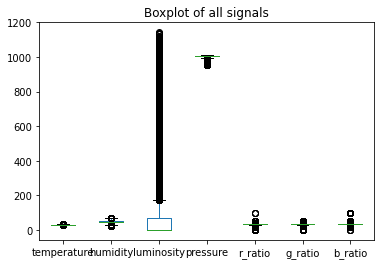

In [25]:
# Plot boxplot
# iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
# plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

In [28]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
1,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
3,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
4,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


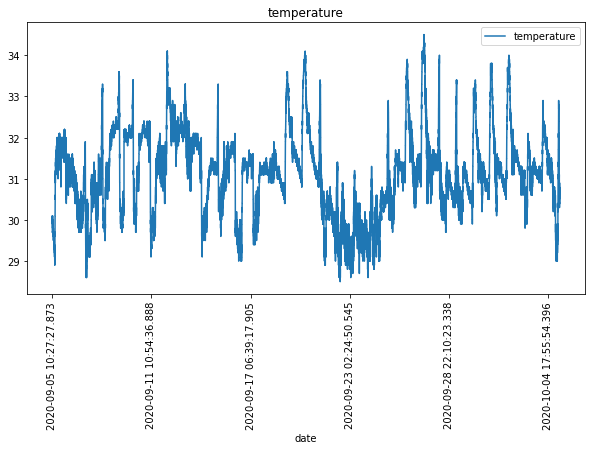

In [31]:
# 0905부터 1005 온도 변화
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=90) # data 각도
plt.show()

### Set style of graph
- plt.style.use('fivethirtyeight')
- plt.style.use('ggplot')

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

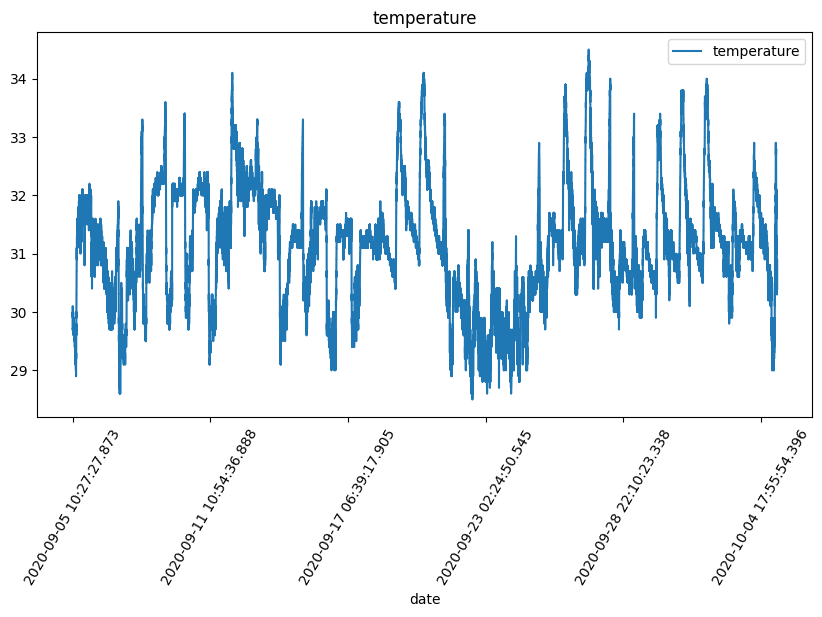

In [38]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('seaborn-pastel') # 'seaborn-pastel', 'fivethirtyeight'
plt.show()

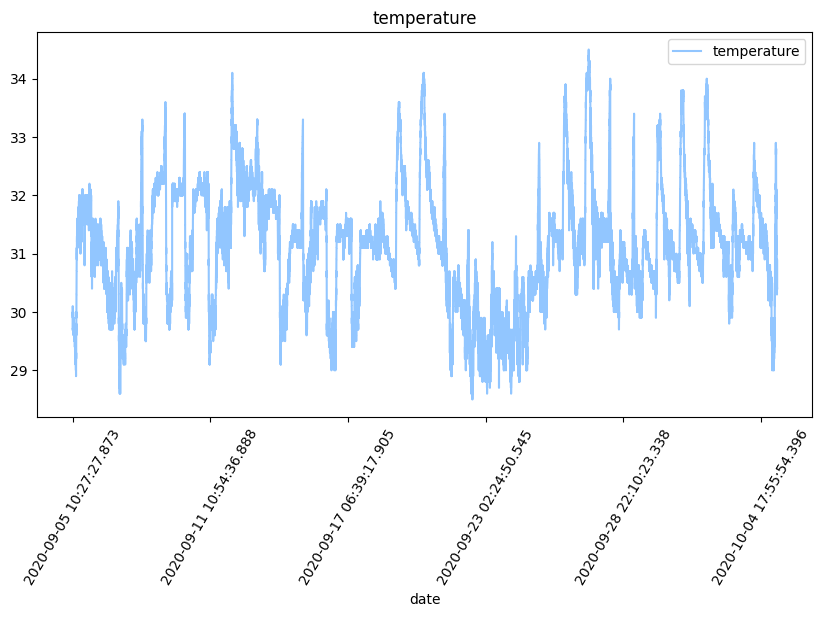

In [39]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('ggplot')
plt.show()

In [40]:
# restore default style
plt.style.use('default')

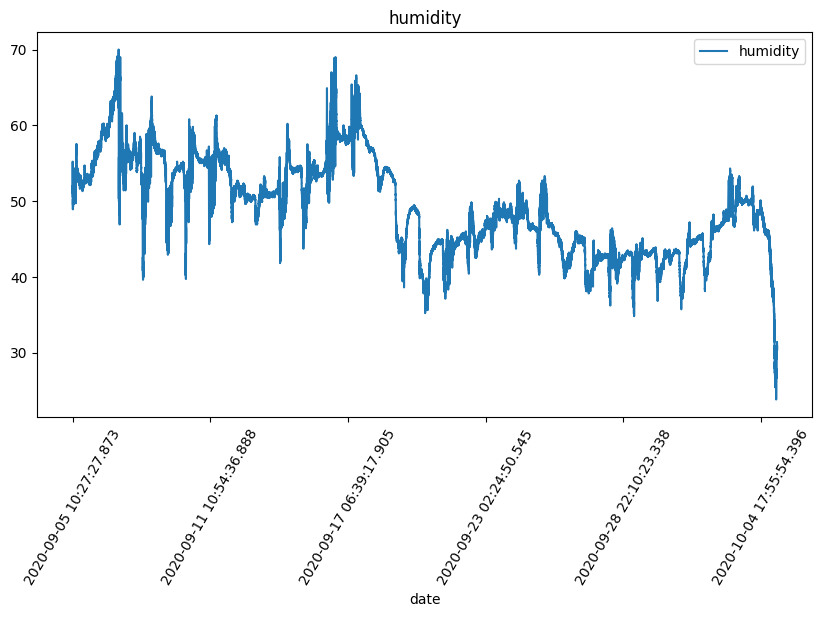

In [41]:
iot_data.plot(x='date', y='humidity', figsize=(10,5), title='humidity') # 습도
plt.xticks(rotation=60)
plt.show()

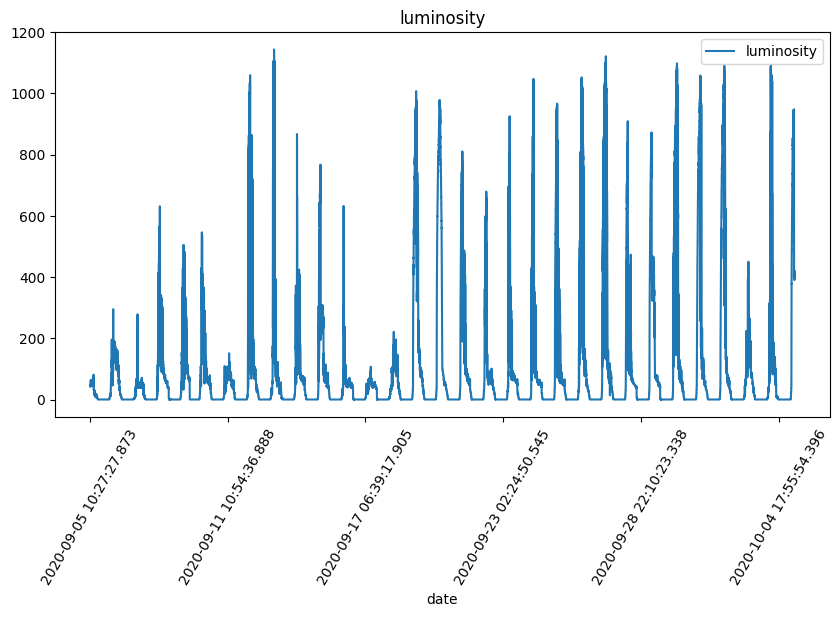

In [42]:
iot_data.plot(x='date', y='luminosity', figsize=(10,5), title='luminosity') # 조도
plt.xticks(rotation=60)
plt.show()

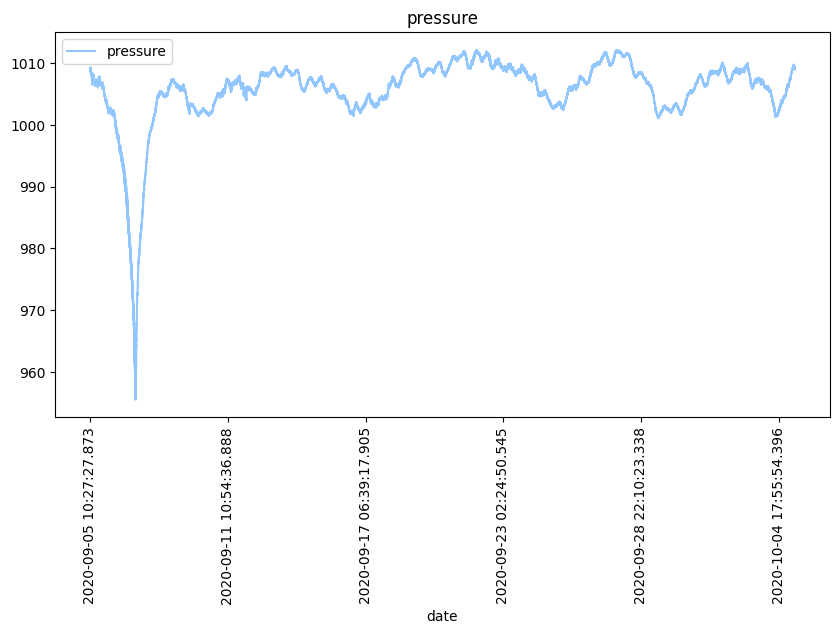

In [56]:
iot_data.plot(x='date', y='pressure', figsize=(10,5), title='pressure') # 압력
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

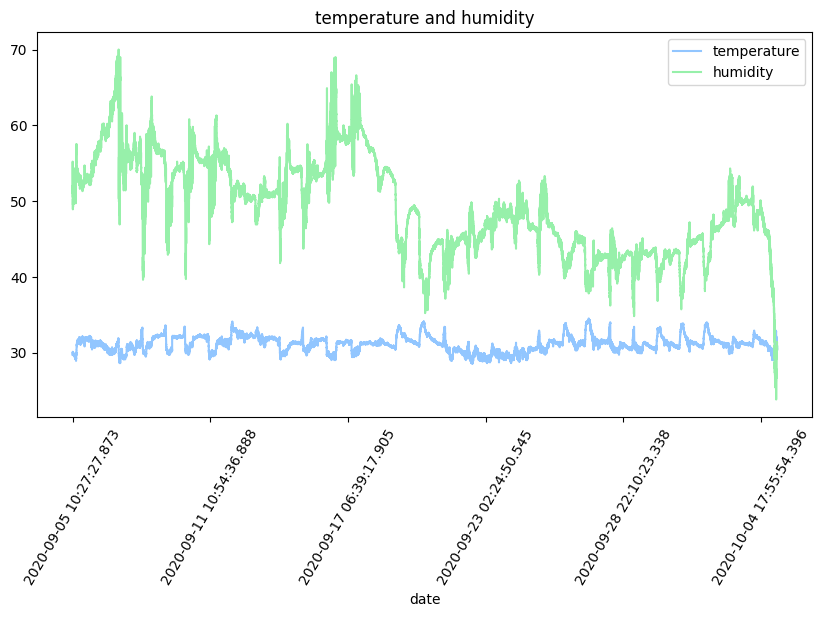

In [57]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(10,5), title='temperature and humidity')
plt.xticks(rotation=60)
plt.show()

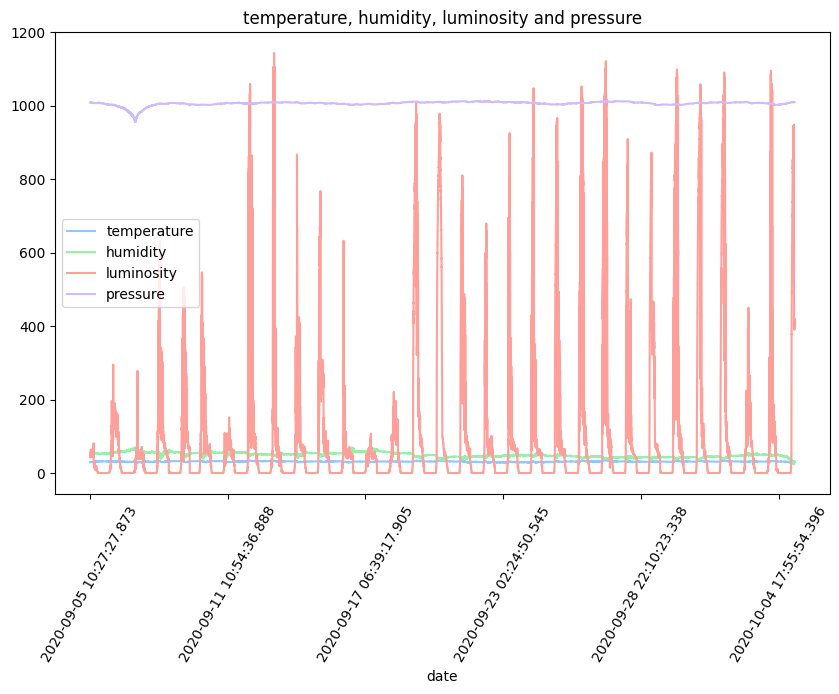

In [58]:
# Plot of ['temperature','humidity','luminosity','pressure']
iot_data.plot(x='date', y=['temperature','humidity','luminosity','pressure'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
plt.xticks(rotation=60)
plt.show()

#### Plot the mean of sensor data

In [59]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    31.151488
humidity       49.233919
luminosity     87.690763
dtype: float64

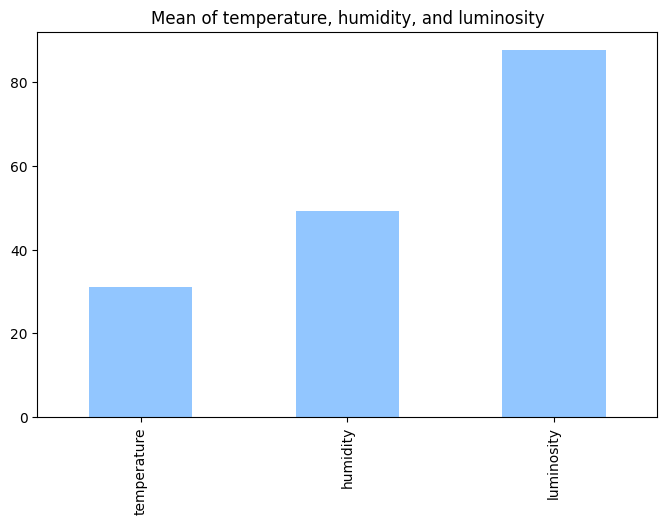

In [60]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

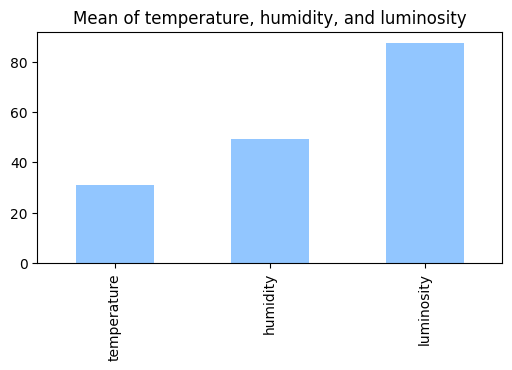

In [50]:
plt.style.use('seaborn-pastel')   # fivethirtyeight, ggplot
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(6,3), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

In [61]:
iot_data.head() # 5초 간격의 변화 데이터 

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
1,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
3,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
4,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


#### Set date as index of timestamp

 - 시간 데이터 응용
 - 변화 지표

In [ ]:
iot_data.head() 

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
1,2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2,2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
3,2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
4,2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


In [62]:
iot_data.set_index('date',inplace=True)

In [63]:
iot_data.head() # index ==> 문자열

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


- 중요 !!

In [66]:
# Convert date index to Datetime index 
iot_data.index = pd.to_datetime(iot_data.index)

In [67]:
iot_data.info() # Range index -> timestamp(Datetime) index  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511662 entries, 2020-09-05 10:27:27.873000 to 2020-10-05 10:13:41.690000
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  511662 non-null  float64
 1   humidity     511662 non-null  float64
 2   luminosity   511662 non-null  int64  
 3   pressure     511662 non-null  float64
 4   r_ratio      511662 non-null  float64
 5   g_ratio      511662 non-null  float64
 6   b_ratio      511662 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 31.2 MB


In [68]:
iot_data.head() # index ==> dataTime

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05 10:27:27.873,29.7,50.6,47,1008.8,31.9,36.2,31.9
2020-09-05 10:27:32.902,29.7,51.5,47,1008.8,33.3,35.4,31.3
2020-09-05 10:27:37.933,29.7,52.1,47,1008.8,33.3,35.4,31.3
2020-09-05 10:27:42.964,29.7,52.5,47,1008.8,31.9,36.2,31.9
2020-09-05 10:27:47.996,29.7,52.2,47,1008.8,31.9,36.2,31.9


In [69]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean() # resample('60S'): 12개 데이터(5초x12)의 평균

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05 10:27:00,29.700000,51.871429,47.000000,1008.800000,32.700000,35.742857,31.557143
2020-09-05 10:28:00,29.750000,51.775000,46.916667,1008.800000,33.083333,35.350000,31.583333
2020-09-05 10:29:00,29.733333,51.550000,47.000000,1008.808333,33.250000,35.341667,31.416667
2020-09-05 10:30:00,29.800000,53.491667,47.000000,1008.800000,33.300000,35.400000,31.300000
2020-09-05 10:31:00,29.875000,54.491667,46.083333,1008.891667,32.016667,36.133333,31.850000
...,...,...,...,...,...,...,...
2020-10-05 10:09:00,30.818182,30.627273,406.909091,1009.290909,34.154545,33.927273,31.918182
2020-10-05 10:10:00,30.825000,30.625000,407.250000,1009.275000,34.150000,33.975000,31.866667
2020-10-05 10:11:00,30.691667,30.575000,409.333333,1009.233333,34.058333,34.025000,31.916667


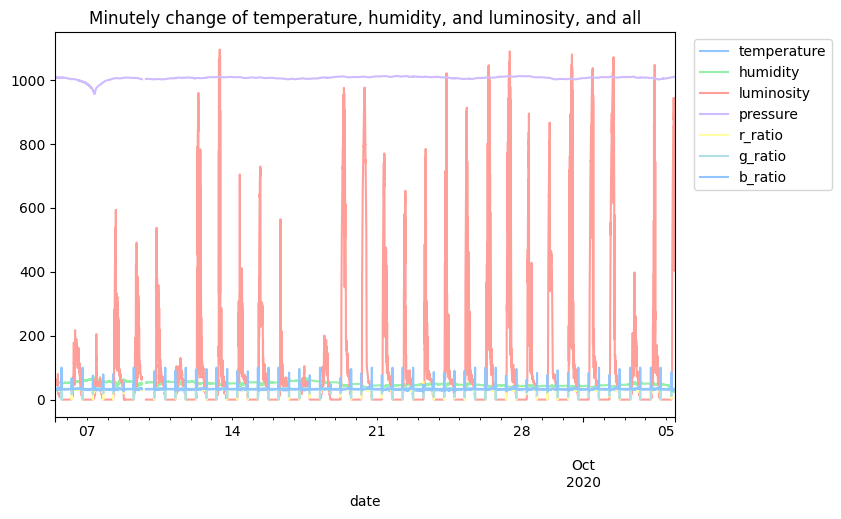

In [73]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of temperature, humidity, and luminosity, and all')
plt.legend(bbox_to_anchor=(1.02, 1.0))
plt.show()

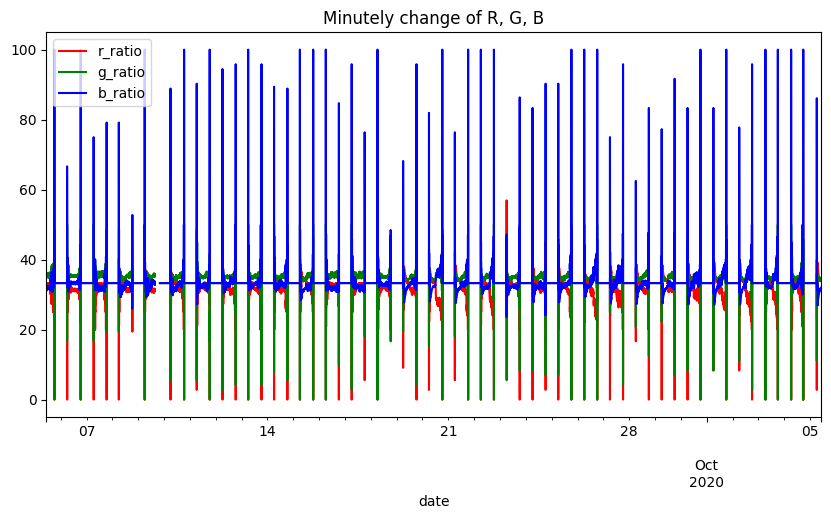

In [74]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('60S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")
plt.show()

In [75]:
3600/50

72.0

In [76]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour # resample('H'): 72개의 데이터 평균

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05 10:00:00,29.905928,51.656701,45.038660,1009.023454,32.465722,35.810052,31.725000
2020-09-05 11:00:00,29.746927,51.612570,51.800279,1008.388408,32.220391,35.737570,32.049022
2020-09-05 12:00:00,29.519161,51.508252,58.072727,1007.453986,32.380140,35.465594,32.181818
2020-09-05 13:00:00,29.251676,51.668296,48.188547,1007.745391,32.238966,35.808659,31.955028
2020-09-05 14:00:00,30.379580,55.524476,30.648951,1007.025175,31.489790,35.347133,33.183916
...,...,...,...,...,...,...,...
2020-10-05 06:00:00,29.374441,37.669972,16.948324,1008.180587,32.098603,33.718436,34.128212
2020-10-05 07:00:00,29.660280,31.689650,535.676923,1008.805874,36.892028,34.448811,28.657343
2020-10-05 08:00:00,31.719413,27.289385,848.600559,1009.250978,34.720950,34.581145,30.688966


In [77]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 721 entries, 2020-09-05 10:00:00 to 2020-10-05 10:00:00
Freq: H
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  717 non-null    float64
 1   humidity     717 non-null    float64
 2   luminosity   717 non-null    float64
 3   pressure     717 non-null    float64
 4   r_ratio      717 non-null    float64
 5   g_ratio      717 non-null    float64
 6   b_ratio      717 non-null    float64
dtypes: float64(7)
memory usage: 45.1 KB


((721, 7), None)

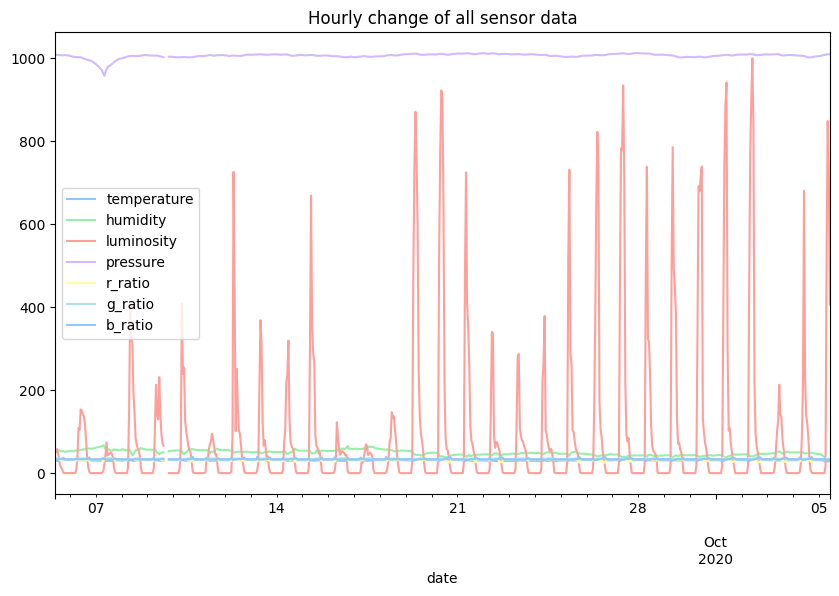

In [78]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), 
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

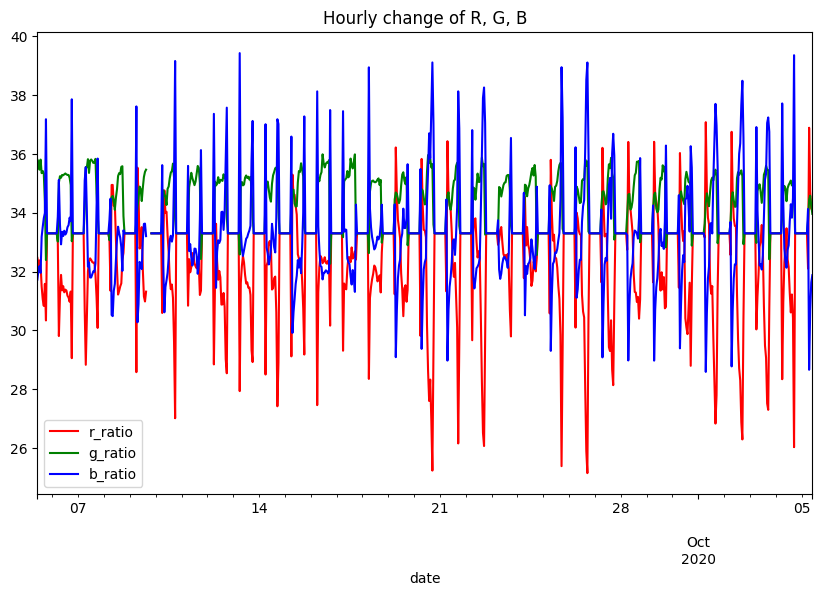

In [79]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of R, G, B')

## [도전하기]  하루 24 시간 동안의 R,G,B 변화 그래프를 그려보시오.

In [80]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()  # resample('D'): 1day

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05,31.052136,52.490464,18.633230,1007.108658,32.213220,34.395232,33.345903
2020-09-06,31.125901,56.391947,45.633727,998.754859,32.057835,34.238456,33.647487
2020-09-07,30.225419,58.862701,17.786629,982.064419,32.311495,34.414029,33.218629
2020-09-08,31.107238,54.912228,78.312584,1004.465155,32.988721,34.087090,32.870780
2020-09-09,31.629219,53.017505,61.163469,1004.937320,32.856440,33.995519,33.094505
2020-09-10,31.622943,54.031462,62.532580,1002.413079,32.539498,34.106411,33.304268
2020-09-11,31.193339,54.651805,26.141551,1006.253831,32.613614,34.135420,33.199051
2020-09-12,32.170306,52.355965,86.934614,1006.245025,32.062719,34.169328,33.718521
2020-09-13,32.029314,50.396815,55.445622,1008.553278,32.097333,34.113053,33.732935


In [81]:
iot_data.resample('D').mean().shape, iot_data.resample('D').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-09-05 to 2020-10-05
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  31 non-null     float64
 1   humidity     31 non-null     float64
 2   luminosity   31 non-null     float64
 3   pressure     31 non-null     float64
 4   r_ratio      31 non-null     float64
 5   g_ratio      31 non-null     float64
 6   b_ratio      31 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


((31, 7), None)

In [82]:
iot_data.resample('D').mean().head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05,31.052136,52.490464,18.633230,1007.108658,32.213220,34.395232,33.345903
2020-09-06,31.125901,56.391947,45.633727,998.754859,32.057835,34.238456,33.647487
2020-09-07,30.225419,58.862701,17.786629,982.064419,32.311495,34.414029,33.218629
2020-09-08,31.107238,54.912228,78.312584,1004.465155,32.988721,34.087090,32.870780
2020-09-09,31.629219,53.017505,61.163469,1004.937320,32.856440,33.995519,33.094505


In [83]:
iot_data_day=iot_data.resample('D').mean() # 새로운 데이터 프레임 생성
iot_data_day.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-05,31.052136,52.490464,18.633230,1007.108658,32.213220,34.395232,33.345903
2020-09-06,31.125901,56.391947,45.633727,998.754859,32.057835,34.238456,33.647487
2020-09-07,30.225419,58.862701,17.786629,982.064419,32.311495,34.414029,33.218629
2020-09-08,31.107238,54.912228,78.312584,1004.465155,32.988721,34.087090,32.870780
2020-09-09,31.629219,53.017505,61.163469,1004.937320,32.856440,33.995519,33.094505


In [84]:
iot_data_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-09-05 to 2020-10-05
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  31 non-null     float64
 1   humidity     31 non-null     float64
 2   luminosity   31 non-null     float64
 3   pressure     31 non-null     float64
 4   r_ratio      31 non-null     float64
 5   g_ratio      31 non-null     float64
 6   b_ratio      31 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


In [89]:
# Save iot Day data in csv file. 
iot_data_day.to_csv('iot_data_day.csv')

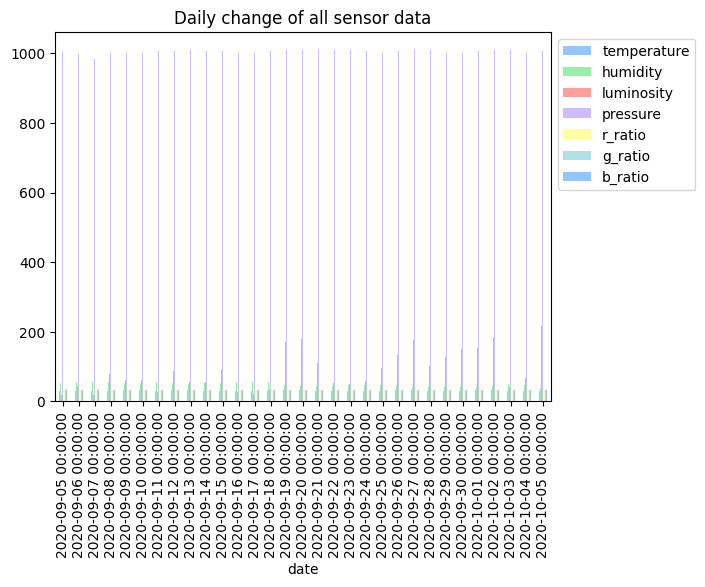

In [88]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of all sensor data')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

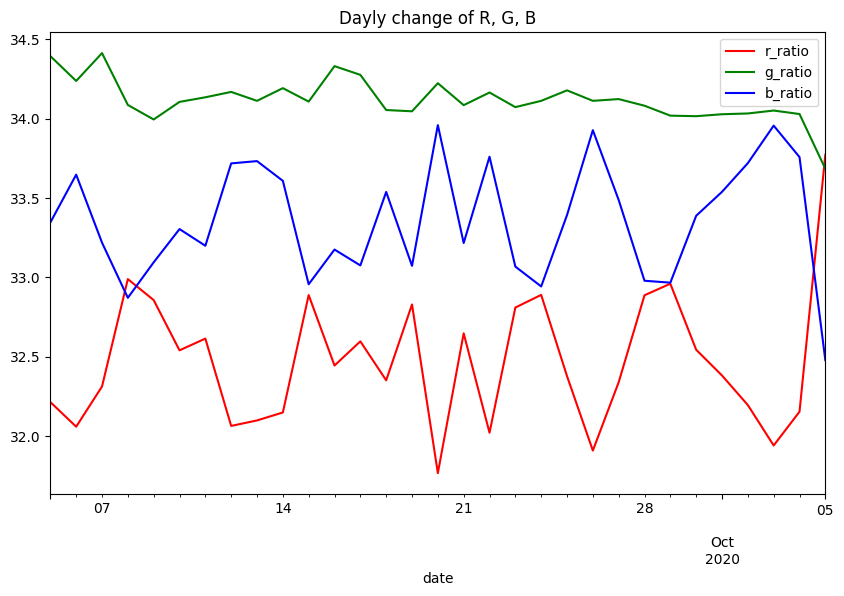

In [93]:
#  Plot mean of the iot data per every day
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean().plot(figsize=(10,6), 
                                    color = ['r','g','b'], #marker='o', ms=6, 
                                    title='Dayly change of R, G, B')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## 위의 그래프를 파이 그래프로 그려보시오.

In [94]:
#  Plot mean of the iot data per every day
# df.plot.pie(subplots=True, figsize=(6, 3))
iot_rgb = iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean()
iot_rgb.head()

,r_ratio,g_ratio,b_ratio
date,,,
2020-09-05,32.213220,34.395232,33.345903
2020-09-06,32.057835,34.238456,33.647487
2020-09-07,32.311495,34.414029,33.218629
2020-09-08,32.988721,34.087090,32.870780
2020-09-09,32.856440,33.995519,33.094505


In [95]:
iot_rgb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-09-05 to 2020-10-05
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   r_ratio  31 non-null     float64
 1   g_ratio  31 non-null     float64
 2   b_ratio  31 non-null     float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [96]:
iot_rgb.iloc[0],iot_rgb.iloc[1]

(r_ratio    32.213220
 g_ratio    34.395232
 b_ratio    33.345903
 Name: 2020-09-05 00:00:00, dtype: float64, r_ratio    32.057835
 g_ratio    34.238456
 b_ratio    33.647487
 Name: 2020-09-06 00:00:00, dtype: float64)

In [101]:
iot_rgb.index, len(iot_rgb.index) # 일별 단위로 변환 됨을 확인할 수 있음

(DatetimeIndex(['2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
                '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
                '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
                '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
                '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
                '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
                '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
                '2020-10-03', '2020-10-04', '2020-10-05'],
               dtype='datetime64[ns]', name='date', freq='D'), 31)

In [98]:
# Convert timestamp to date string
iot_rgb.index[0].strftime('%Y-%m-%d')  # strftime: 시간 -> 문자열 포맷

'2020-09-05'

- 파이 그래프

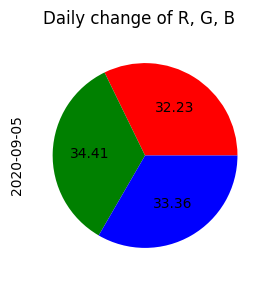

In [102]:
iot_rgb.iloc[0].plot.pie(subplots=True, figsize=(5,3), 
                         colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f', 
                         title='Daily change of R, G, B')
plt.ylabel(iot_rgb.index[0].strftime('%Y-%m-%d')) # 인덱스 0 : 첫날의 데이터
plt.show()

## Weekly graph

In [104]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean() # 6주 (6개 데이터)

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2020-09-06,31.099293,54.984607,35.894129,1001.768235,32.113885,34.295008,33.538700
2020-09-13,31.419573,54.061671,55.310878,1002.052971,32.485301,34.150155,33.311613
2020-09-20,31.271911,52.473033,83.510902,1006.640105,32.431325,34.176695,33.340780
2020-09-27,30.659709,45.391859,96.892901,1008.407316,32.426786,34.122043,33.399305
2020-10-04,31.316058,44.537857,117.830943,1006.450567,32.436651,34.037408,33.472475
2020-10-11,30.458942,38.077169,217.271485,1007.299003,33.773234,33.684260,32.477210


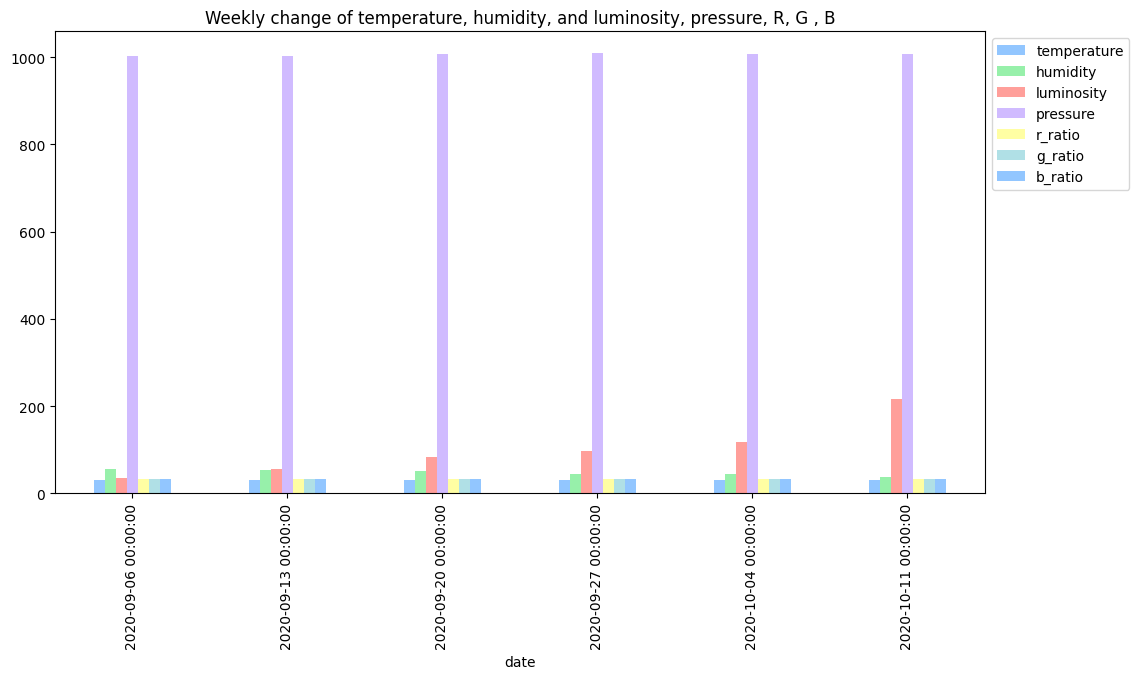

In [107]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity, pressure, R, G , B')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

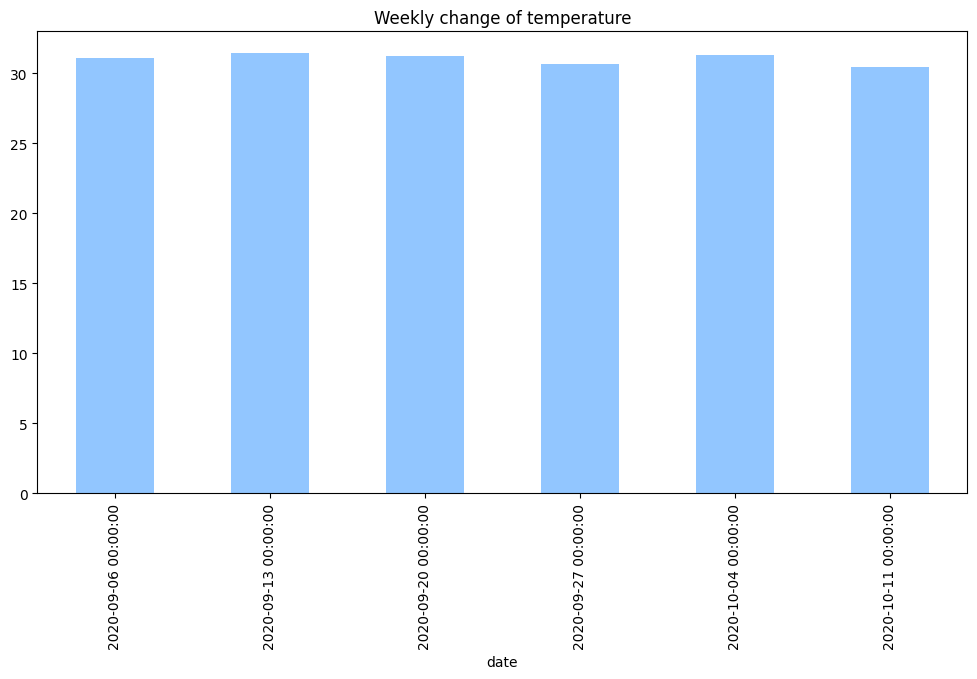

In [114]:
#  Plot mean of the iot data per every week
iot_data['temperature'].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature')
plt.show()

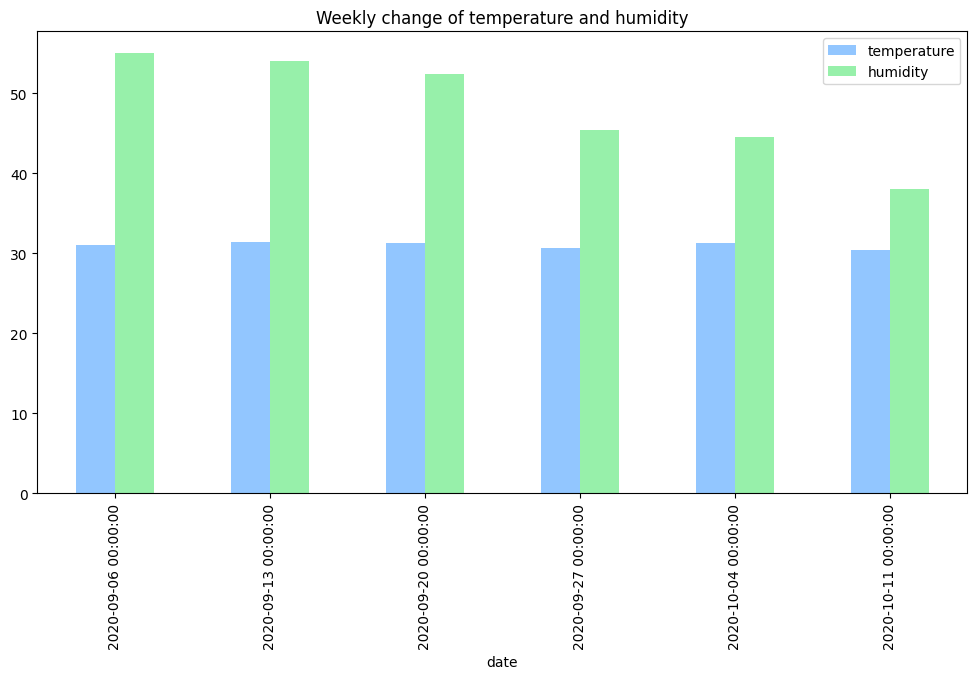

In [115]:
#  Plot mean of the iot data per every week # 주별 온도, 습도 막대 그래프
iot_data[['temperature', 'humidity']].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature and humidity')
plt.show()

 # [도전] 다중 파이 그래프

### 다중 파이 그래프
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [117]:
iot_rgb.shape

(31, 3)

In [118]:
iot_rgb.index.size

31

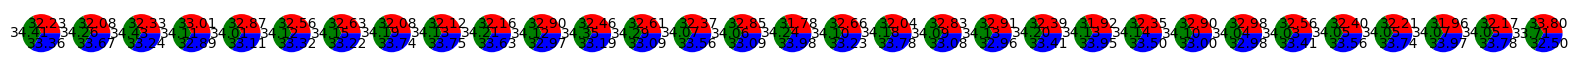

In [120]:
fig, axs = plt.subplots(nrows=1, ncols=iot_rgb.index.size, figsize=(20,5))

fig.subplots_adjust(hspace=0.5, wspace=0.05) # 높이, 폭 간격 설정

for row in range(iot_rgb.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(iot_rgb.iloc[row],
            colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f')  #, labels=df.columns)
    plt.ylabel(iot_rgb.index[row].strftime('%Y-%m-%d'))
    plt.axis('off') # 31개의 축

### axes array 코드 참조
```
for row in ax:
    for col in row:
        col.plot(x, y)
```

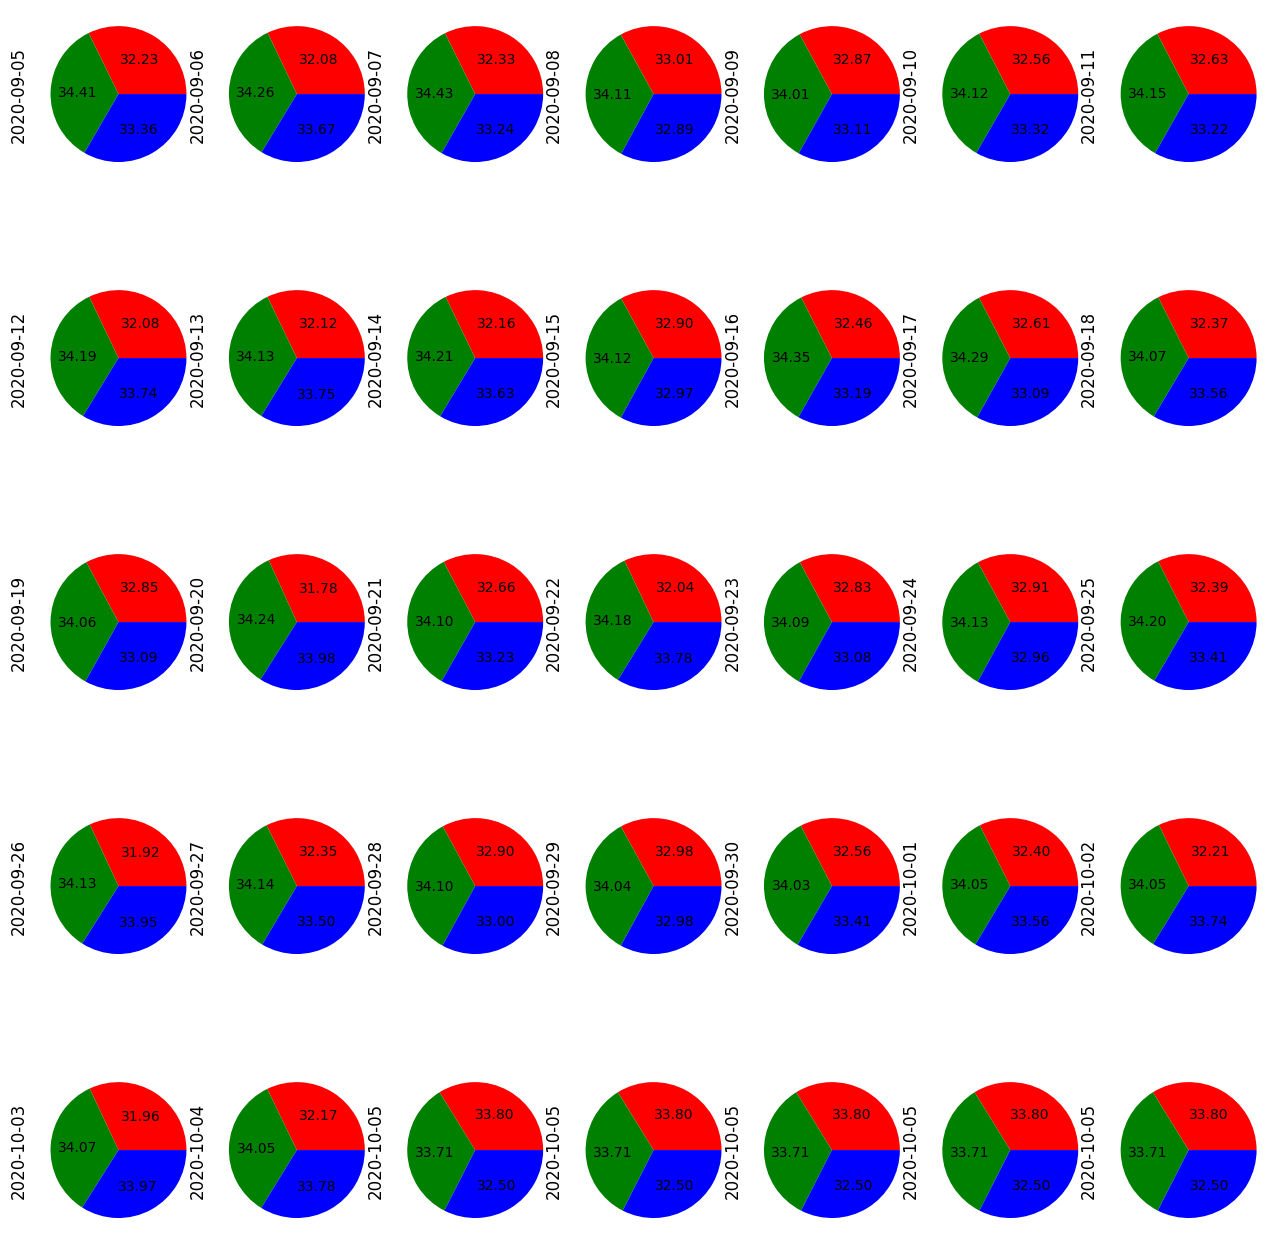

In [122]:
fig, axs = plt.subplots(nrows=(iot_rgb.index.size-1)//7+1, ncols=7, figsize=(16,16))
# axs.set_axis_off()

fig.subplots_adjust(hspace=0.5, wspace=0.05)
idx=0
for row in axs:
    # fig.add_subplot(axs[row] )
    # fig.add_subplot(5, 7, row+1)
    # ax = axs[row]
    for col in row:
        col.pie(iot_rgb.iloc[idx], # 날짜
            colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f')  #, labels=df.columns)  # autopct='%.2f': 백분율 -> 소수점 둘째 자리
        
        col.set_ylabel(iot_rgb.index[idx].strftime('%Y-%m-%d'),fontsize=12)
        idx = idx + 1

        if idx == iot_rgb.index.size:
            idx = iot_rgb.index.size-1 # 10월 5일 이후에 동일한 그래프 채우기
        
    # plt.axis('off')
    # plt.axis('off')
    # plt.grid(False)
plt.show()

### animate pie chart
- https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
- https://pinkwink.kr/1090

In [124]:
iot_rgb.columns

Index(['r_ratio', 'g_ratio', 'b_ratio'], dtype='object')

In [127]:
iot_rgb.shape

(31, 3)

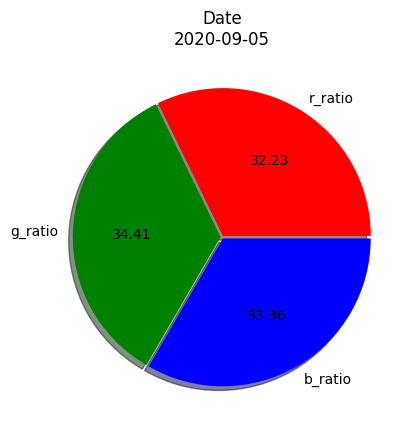

In [125]:
fig,ax = plt.subplots()
explode=[0.01,0.01,0.01] #pop out each slice from the pie
def getmepie(i):
    iv = min(i, len(iot_rgb.index)-1)
    # def absolute_value(val): #turn % back to a number
    #     a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    #     return int(a)
    ax.clear()
    plot = iot_rgb.iloc[iv].plot.pie(y=iot_rgb.columns, autopct='%.2f', label='',explode = explode, colors=['r','g','b'], shadow = True)
    plot.set_title('Date\n' + str(iot_rgb.index[iv].strftime('%Y-%m-%d')), fontsize=12)

# import matplotlib.animation as ani
animator = animation.FuncAnimation(fig, getmepie, interval = 200)
# plt.show()
rc('animation', html='html5')
animator

## 와, Great!